In [ ]:
import os, sys
from google.colab import drive
drive.mount('/content/drive')
my_path = '/content/notebooks'
os.symlink('/content/drive/My Drive/Colab Notebooks', my_path)
sys.path.insert(0,my_path)

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 37 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (5,892 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155013 files and d

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [ ]:
from pyarrow import csv
import pandas as pd

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/ cakd3_colab/LDATA/dataset구매데이터(중소분류제외).csv')

In [ ]:
data.drop('Unnamed: 0',axis=1,inplace=True)
#중간데이터셋: 고객번호, 연령대, 거주지, 멤버십가입일, 멤버십종류, 온라인이용횟수, 경쟁사 이용횟수, 경쟁사 최근이용일, 최근 구매일, 구매빈도, 2년 총 구매금액, 분기별 총구매금액 4개, 분기별 총구매금액 2개



In [ ]:
data_new = pd.read_csv('/content/drive/MyDrive/ cakd3_colab/LDATA/구매(중소분류제외).csv')

In [ ]:
data_new.head()

,고객번호,구매금액,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년4분기,A_MOBILE/APP,B_MOBILE/APP,B_ONLINEMALL,C_MOBILE/APP,C_ONLINEMALL,D_MOBILE/APP,A01,A02,B01,B02,C01,C02,C03,D01,D02
0,1,85042550,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,NaN,NaN,NaN,5.0,NaN,NaN
1,2,99880760,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,1.0
2,3,3165167,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,16693810,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,5,13237070,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,NaN,2616260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_ch=csv.read_csv('/content/drive/MyDrive/ cakd3_colab/LDATA/dataset/channel.csv').to_pandas()
data_ch.head()

,고객번호,제휴사,이용횟수
0,3280,A_MOBILE/APP,2
1,3284,B_MOBILE/APP,33
2,3289,B_MOBILE/APP,3
3,3292,A_MOBILE/APP,12
4,3292,B_MOBILE/APP,6


In [ ]:
ch = pd.pivot_table(data_ch,values='이용횟수',index='고객번호',columns='제휴사',aggfunc='sum')
ch

제휴사,A_MOBILE/APP,B_MOBILE/APP,B_ONLINEMALL,C_MOBILE/APP,C_ONLINEMALL,D_MOBILE/APP
고객번호,,,,,,
7,4.0,NaN,NaN,NaN,NaN,NaN
14,1.0,NaN,NaN,NaN,NaN,NaN
42,NaN,23.0,NaN,NaN,NaN,NaN
74,1.0,30.0,11.0,NaN,NaN,NaN
94,NaN,14.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
19376,NaN,1.0,NaN,NaN,NaN,NaN
19377,NaN,NaN,NaN,NaN,NaN,5.0
19380,NaN,NaN,NaN,NaN,NaN,1.0


In [ ]:
data_cu=csv.read_csv('/content/drive/MyDrive/ cakd3_colab/LDATA/dataset/compuse.csv').to_pandas()
data_cu['이용년월'].unique()

array([201506, 201511, 201512, 201501, 201505, 201507, 201503, 201504,
       201508, 201502, 201510, 201509])

In [ ]:
def cat(x):
  ''
  if x <= 201403:
    y = '14년 1분기'
  elif x <= 201406:
    y = '14년 2분기'
  elif x <= 201409:
    y = '14년 3분기'
  elif x <= 201412:
    y = '14년 4분기'
  elif x <= 201503:
    y = '15년 1분기'
  elif x <= 201506:
    y = '15년 2분기'
  elif x <= 201509:
    y = '15년 3분기'
  else: y = '15년4분기' 
  ''
  return y

data_cu['구매일자(분기)'] = data_cu['이용년월'].apply(lambda x: cat(x))

In [ ]:
data_cu['이용년월'].unique()

array([201506, 201511, 201512, 201501, 201505, 201507, 201503, 201504,
       201508, 201502, 201510, 201509])

In [ ]:
a = pd.pivot_table(data_cu,values='이용년월',index='고객번호',columns='구매일자(분기)',aggfunc='count')
a

구매일자(분기),15년 1분기,15년 2분기,15년 3분기,15년4분기
고객번호,,,,
1,2.0,1.0,7.0,5.0
2,NaN,2.0,2.0,4.0
4,NaN,1.0,1.0,1.0
7,NaN,1.0,NaN,NaN
8,1.0,NaN,NaN,2.0
...,...,...,...,...
19370,5.0,8.0,5.0,6.0
19372,4.0,NaN,NaN,NaN
19375,1.0,NaN,3.0,2.0


In [ ]:
a.fillna(0,inplace=True)

In [ ]:
a = a.astype(int)

In [ ]:
 a1 = a['15년 1분기'].values.sum()

In [ ]:
 a2 = a['15년 2분기'].values.sum()

In [ ]:
 a3 = a['15년 3분기'].values.sum()

In [ ]:
 a4 = a['15년4분기'].values.sum()

In [ ]:
a5 = pd.DataFrame({'quarter':['15-1','15-2','15-3','15-4'],
                   'couse':[a1, a2, a3, a4]})
a5

,quarter,couse
0,15-1,6703
1,15-2,6869
2,15-3,7302
3,15-4,7285


In [ ]:
a6 = pd.pivot_table(a5,values='couse',index='quarter')
a6

,couse
quarter,
15-1,6703
15-2,6869
15-3,7302
15-4,7285


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 

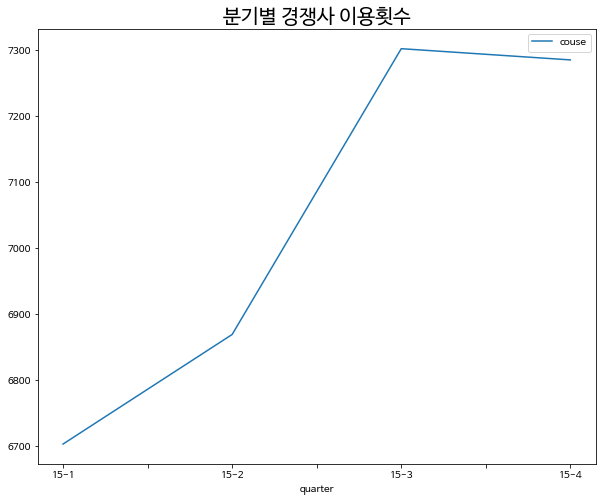

In [ ]:
a6.plot(kind='line', figsize=(10,8))
plt.title( '분기별 경쟁사 이용횟수', size=20 )
plt.legend(labels=a6.columns, loc='best')
plt.show()

In [ ]:
data_cu1 = data_cu.drop('제휴사',axis=1)
cu1 = pd.pivot_table(data_cu1,values='경쟁사',index='고객번호',columns='이용년월',aggfunc='count')
cu1.head()

이용년월,201501,201502,201503,201504,201505,201506,201507,201508,201509,201510,201511,201512
고객번호,,,,,,,,,,,,
1,1.0,1.0,NaN,1.0,NaN,NaN,3.0,2.0,2.0,1.0,2.0,2.0
2,NaN,NaN,NaN,1.0,NaN,1.0,2.0,NaN,NaN,1.0,2.0,1.0
4,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
7,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN


In [ ]:
data_cu[data_cu['고객번호']==1][data_cu['경쟁사']=='A01'] # 고객 아이디 기준 경쟁사 이용횟수 집계

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,고객번호,제휴사,경쟁사,이용년월
1784,1,A,A01,201507


In [ ]:
cu = pd.pivot_table(data_cu,values='이용년월',index='고객번호',columns='경쟁사',aggfunc='count')
cu.head()

경쟁사,A01,A02,B01,B02,C01,C02,C03,D01,D02
고객번호,,,,,,,,,
1,1.0,1.0,8.0,NaN,NaN,NaN,5.0,NaN,NaN
2,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,1.0
4,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
7,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.head()

,고객번호,제휴사,영수증번호,점포코드,대분류코드,구매일자,구매시간,구매금액,구매일자(반기),구매일자(분기)
0,17218,B,8664000,44,15,20140222,20,2420,14년상반기,14년 1분기
1,17218,B,8664000,44,16,20140222,20,1070,14년상반기,14년 1분기
2,17218,B,8664000,44,16,20140222,20,8060,14년상반기,14년 1분기
3,17218,B,8664000,44,18,20140222,20,6000,14년상반기,14년 1분기
4,17674,B,8664001,44,5,20140222,22,1120,14년상반기,14년 1분기


In [ ]:
data.groupby(['고객번호','구매일자(분기)'])[['구매금액']].sum('구매금액')

q = pd.pivot_table(data,values='구매금액',index='고객번호',columns='구매일자(분기)',aggfunc='sum')
q

구매일자(분기),14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년4분기
고객번호,,,,,,,,
1,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0
2,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0
3,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0
4,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0
5,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,NaN,2616260.0
...,...,...,...,...,...,...,...,...
19379,NaN,NaN,130300.0,1060320.0,1131020.0,1264900.0,805550.0,1387190.0
19380,NaN,NaN,NaN,522700.0,486830.0,351120.0,368907.0,2183420.0
19381,NaN,NaN,NaN,NaN,1124750.0,1672421.0,1867501.0,1375997.0


In [ ]:
total_amt = data.groupby('고객번호')[['구매금액']].sum('구매금액')
total_amt

,구매금액
고객번호,
1,85042550
2,99880760
3,3165167
4,16693810
5,13237070
...,...
19379,5779280
19380,3912977
19381,6040669


In [ ]:
data3 = pd.merge(total_amt,q,on='고객번호')

In [ ]:
data4 = pd.merge(data3,ch,on='고객번호',how='outer')
data4.head()

,구매금액,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년4분기,A_MOBILE/APP,B_MOBILE/APP,B_ONLINEMALL,C_MOBILE/APP,C_ONLINEMALL,D_MOBILE/APP
고객번호,,,,,,,,,,,,,,,
1,85042550,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,NaN,NaN,NaN,NaN,NaN,NaN
2,99880760,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3165167,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0,NaN,NaN,NaN,NaN,NaN,NaN
4,16693810,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0,NaN,NaN,NaN,NaN,NaN,NaN
5,13237070,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,NaN,2616260.0,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data4

,구매금액,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년4분기,A_MOBILE/APP,B_MOBILE/APP,B_ONLINEMALL,C_MOBILE/APP,C_ONLINEMALL,D_MOBILE/APP
고객번호,,,,,,,,,,,,,,,
1,85042550,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,NaN,NaN,NaN,NaN,NaN,NaN
2,99880760,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,NaN,NaN,NaN,NaN,NaN,NaN
3,3165167,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0,NaN,NaN,NaN,NaN,NaN,NaN
4,16693810,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0,NaN,NaN,NaN,NaN,NaN,NaN
5,13237070,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,NaN,2616260.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19379,5779280,NaN,NaN,130300.0,1060320.0,1131020.0,1264900.0,805550.0,1387190.0,NaN,NaN,NaN,NaN,NaN,NaN
19380,3912977,NaN,NaN,NaN,522700.0,486830.0,351120.0,368907.0,2183420.0,NaN,NaN,NaN,NaN,NaN,1.0
19381,6040669,NaN,NaN,NaN,NaN,1124750.0,1672421.0,1867501.0,1375997.0,NaN,5.0,NaN,NaN,NaN,NaN


In [ ]:
data5 = pd.merge(data4,cu,on='고객번호',how='outer')
data5.head()

,구매금액,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년4분기,A_MOBILE/APP,B_MOBILE/APP,B_ONLINEMALL,C_MOBILE/APP,C_ONLINEMALL,D_MOBILE/APP,A01,A02,B01,B02,C01,C02,C03,D01,D02
고객번호,,,,,,,,,,,,,,,,,,,,,,,,
1,85042550,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,NaN,NaN,NaN,5.0,NaN,NaN
2,99880760,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,1.0
3,3165167,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16693810,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,13237070,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,NaN,2616260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data5 # 고객 아이디 기준, 2년 간 총 구매액, 분기별 구매액, 이용채널(횟수), 경쟁사별 이용횟수

,구매금액,14년 1분기,14년 2분기,14년 3분기,14년 4분기,15년 1분기,15년 2분기,15년 3분기,15년4분기,A_MOBILE/APP,B_MOBILE/APP,B_ONLINEMALL,C_MOBILE/APP,C_ONLINEMALL,D_MOBILE/APP,A01,A02,B01,B02,C01,C02,C03,D01,D02
고객번호,,,,,,,,,,,,,,,,,,,,,,,,
1,85042550,9141590.0,10783765.0,10781550.0,23334762.0,9302985.0,8595380.0,7806580.0,5295938.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,8.0,NaN,NaN,NaN,5.0,NaN,NaN
2,99880760,14123470.0,10199760.0,14841180.0,7080920.0,18481480.0,9310130.0,13842600.0,12001220.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,NaN,1.0,1.0,NaN,1.0
3,3165167,302782.0,548433.0,648188.0,394366.0,279310.0,312970.0,421017.0,258101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16693810,1309643.0,3732463.0,2434410.0,1823100.0,1737292.0,1919645.0,2127112.0,1610145.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
5,13237070,3145330.0,2314820.0,1827290.0,398440.0,2124430.0,810500.0,NaN,2616260.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19379,5779280,NaN,NaN,130300.0,1060320.0,1131020.0,1264900.0,805550.0,1387190.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19380,3912977,NaN,NaN,NaN,522700.0,486830.0,351120.0,368907.0,2183420.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19381,6040669,NaN,NaN,NaN,NaN,1124750.0,1672421.0,1867501.0,1375997.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:

base_path = '/content/drive/MyDrive/ cakd3_colab/LDATA/dataset'



data5.to_csv(base_path + '구매데이터(중소분류제외).csv')
